In [5]:
#import package
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as sci

## 1. AB process     

$$
\begin{equation}
    A  \xrightarrow{k_1}  B   \\
    B  \xrightarrow{k_2}  A 
\end{equation}
$$

$$
\begin{equation}
\frac{d}{dt} \begin{pmatrix}
E(X_A)\\
E(X_B) 
\end{pmatrix} =
\begin{pmatrix}
-k_1 & k_2 \\
k_1 & -k_2
\end{pmatrix}
\begin{pmatrix}
E(X_A)\\
E(X_B) 
\end{pmatrix}
\end{equation}
$$

In [1]:
#parameters
k1 = 10**(-3)
k2 = 4* 10**(-3)
A0=175
B0 =25
t=0
t_end= 2000000

### Determinstic simulation

In [22]:
def t_deterministic(k1,k2,A0,B0):
    def f(v ,t):
        x,y = v
        return -k1*x + k2*y , k1*x - k2*y
    tspan = np.arange(t_end+1)
    return sci.odeint( f , ( A0, B0) , tspan)

### Sochastic simulation

In [15]:
def t_stochastic(k1,k2,A0,B0 ) :
    
    #initial setting
    A = A0
    B = B0
    t_sample = 10*max(1/k1 , 1/k2)
    
    t_array = np.zeros(int( t_end/t_sample) +1 )
    A_array = np.zeros( int(t_end/t_sample) +1)
    B_array = np.zeros( int(t_end/t_sample) +1)
   
    j=0
    t_array[j] = j
    A_array[j] = A
    B_array[j] = B
    
    #start the process
  
    t=0
    while t < t_end :
        #compute stochastic rate
        a = [k1*A , k2*B ]
        a0 = sum(a)
    
        #genertae two uniform r.vs
        r1 , r2 = np.random.rand(2)
    
        #update time (exclude r1=0 ) according the lemma
        while r1 ==0:
            r1 = np.random.rand(1)
        t_next = (1/a0)*(  np.log(1/r1))
        t = t + t_next
        
        #determine next reaction according the lemma
        i = 0
        mu = 0
        amu = 0 
        while amu < r2*a0 : #sum up a_i until the value exceed a0*r2
            mu = mu + 1
            amu = amu + a[i]
            i = i+1
        #update the state
        if mu == 1:
            A = A-1
            B = B+1
        elif mu ==2 :
            A = A +1
            B = B - 1
    
        #sample the data , if t is already out of range then stop
        if t > t_end:
            print('done')
            break
        
    
        if t >= j*t_sample: 
            j = j+1
            t_array[j] = j
            A_array[j] = A
            B_array[j] = B
            print("now" , j ,"-th sample")
    return  t_array , A_array , B_array 

In [17]:
 t_array , A_array , B_array = t_stocha(k1,k2,A0,B0 )

now 1 -th sample
now 2 -th sample
now 3 -th sample
now 4 -th sample
now 5 -th sample
now 6 -th sample
now 7 -th sample
now 8 -th sample
now 9 -th sample
now 10 -th sample
now 11 -th sample
now 12 -th sample
now 13 -th sample
now 14 -th sample
now 15 -th sample
now 16 -th sample
now 17 -th sample
now 18 -th sample
now 19 -th sample
now 20 -th sample
now 21 -th sample
now 22 -th sample
now 23 -th sample
now 24 -th sample
now 25 -th sample
now 26 -th sample
now 27 -th sample
now 28 -th sample
now 29 -th sample
now 30 -th sample
now 31 -th sample
now 32 -th sample
now 33 -th sample
now 34 -th sample
now 35 -th sample
now 36 -th sample
now 37 -th sample
now 38 -th sample
now 39 -th sample
now 40 -th sample
now 41 -th sample
now 42 -th sample
now 43 -th sample
now 44 -th sample
now 45 -th sample
now 46 -th sample
now 47 -th sample
now 48 -th sample
now 49 -th sample
now 50 -th sample
now 51 -th sample
now 52 -th sample
now 53 -th sample
now 54 -th sample
now 55 -th sample
now 56 -th sample
n

Text(0.5,1,'B hist')

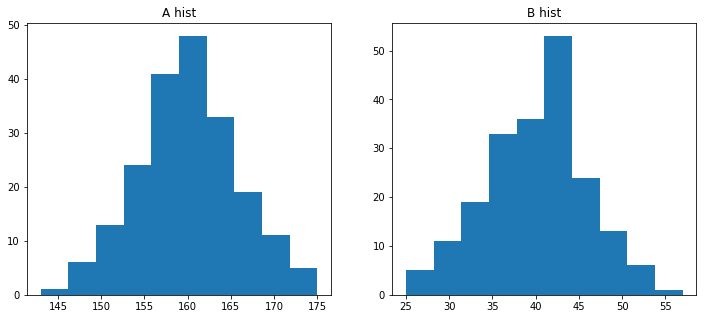

In [27]:
fig , ax = plt.subplots(1,2 ,  figsize=(12,5))
ax[0].hist(A_array)
ax[0].set_title("A hist")
ax[1].hist(B_array)
ax[1].set_title("B hist")

In [24]:
t_deter = t_deterministic(k1,k2,A0,B0)

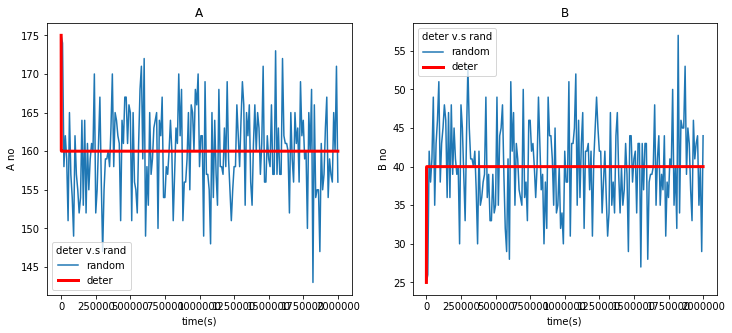

In [26]:
t_sample= 10*max(1/k1 , 1/k2)
fig , ax = plt.subplots(1,2 ,  figsize=(12,5))
ax[0].set_title("A")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('A no')

ax[0].plot( t_sample * t_array , A_array , label = "random" )
ax[0].plot( t_deter[:,0] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[0].legend(title = "deter v.s rand")

ax[1].set_title("B")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('B no')

ax[1].plot( t_sample * t_array , B_array , label = "random" )
ax[1].plot( t_deter[:,1] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[1].legend(title = "deter v.s rand")

## 2. Michaelis-Menten kinetics
$$
\begin{aligned}
    S + E  &\xrightarrow{k_+} C \\
    C  &\xrightarrow{k_{-}} S + E \\
     C &\xrightarrow{k_2} P + E
\end{aligned}
$$

$$
\begin{aligned}
    \frac{d E( X_S )}{dt} &= - k_{+}  E( X_S )E( X_E ) + k_{-}E( X_C) \\
    \frac{d E( X_E )}{dt} &= - k_{+}  E( X_S )E( X_E ) + (k_{-}  + k_2 )E( X_C) \\
    \frac{d E( X_C )}{dt} &=   k_{+}  E( X_S )E( X_E ) - (k_{-}  + k_2 )E( X_C) \\
    \frac{d E( X_P )}{dt} &=   k_2    E( X_C)
\end{aligned}
$$

In [58]:
#parameters
kp = 1.1
km = 0.1
k2 = 0.8
S0=100
E0 =100
C0=1
P0=1
t=0
t_end= 20000
t_sample = 0.01*max(1/kp , 1/km , 1/k2  )

### Determinstic simulation

In [59]:
def t_deterministic(k1,k2,A0,B0):
    def f(v ,t):
        S,E,C,P = v
        return -kp*S*E + km*C , -kp*S*E + (km+k2)*C , kp*S*E - (km + k2)*C , k2*C
    tspan = np.arange(t_end+1)
    return sci.odeint( f , ( S0, E0 , C0 , P0) , tspan)

In [60]:
def t_stochastic(kp, km , k2 ,S0, E0 , C0 , P0) :
    
    #initial setting
    S = S0
    E = E0
    C = C0 
    P = P0
    
    
    t_array = np.zeros(int( t_end/t_sample) +1 )
    S_array = np.zeros( int(t_end/t_sample) +1)
    E_array = np.zeros( int(t_end/t_sample) +1)
    C_array = np.zeros( int(t_end/t_sample) +1)
    P_array = np.zeros( int(t_end/t_sample) +1)    
    
    j=0
    t_array[j] = j
    S_array[j] = S
    E_array[j] = E
    C_array[j] = C
    P_array[j] = P
    #start the process
  
    t=0
    while t < t_end :
        #compute stochastic rate
        a = [kp*S*E , km*C , k2*C ]
        a0 = sum(a)
        
        #Only P left , this case is a absorbing state
        if a0 == 0 :
        
        if a0 != 0 :
            #genertae two uniform r.vs
            r1 , r2 = np.random.rand(2)
    
            #update time (exclude r1=0 ) according the lemma
            while r1 ==0:
                r1 = np.random.rand(1)

            t_next = (1/a0)*(  np.log(1/r1))  
            t = t + t_next
        
            #determine next reaction according the lemma
            i = 0
            mu = 0
            amu = 0 
            while amu < r2*a0 : #sum up a_i until the value exceed a0*r2
                mu = mu + 1
                amu = amu + a[i]
                i = i+1
            #update the state
            if mu == 1:
                S = S-1
                E = E-1
                C = C+1
            elif mu ==2 :
                S = S +1
                E = E +1
                C = C - 1
            else :
                C = C - 1
                P = P + 1
            #sample the data , if t is already out of range then stop
            if t > t_end:
                print('done')
                break
        
    
            if t >= j*t_sample: 
                j = j+1
                t_array[j] = j
                S_array[j] = S
                E_array[j] = E
                C_array[j] = C
                P_array[j] = P
                print("now" , j ,"-th sample")
    return  t_array , S_array , E_array , C_array  , P_array  

now 1 -th sample
now 2 -th sample
now 3 -th sample
now 4 -th sample
now 5 -th sample
now 6 -th sample
now 7 -th sample
now 8 -th sample
now 9 -th sample
now 10 -th sample
now 11 -th sample
now 12 -th sample
now 13 -th sample
now 14 -th sample
now 15 -th sample
now 16 -th sample
now 17 -th sample
now 18 -th sample
now 19 -th sample
now 20 -th sample
now 21 -th sample
now 22 -th sample
now 23 -th sample
now 24 -th sample
now 25 -th sample
now 26 -th sample
now 27 -th sample
now 28 -th sample
now 29 -th sample
now 30 -th sample
now 31 -th sample
now 32 -th sample
now 33 -th sample
now 34 -th sample
now 35 -th sample
now 36 -th sample
now 37 -th sample
now 38 -th sample
now 39 -th sample
now 40 -th sample
now 41 -th sample
now 42 -th sample
now 43 -th sample
reaction is over , only P left


IndexError: too many indices for array

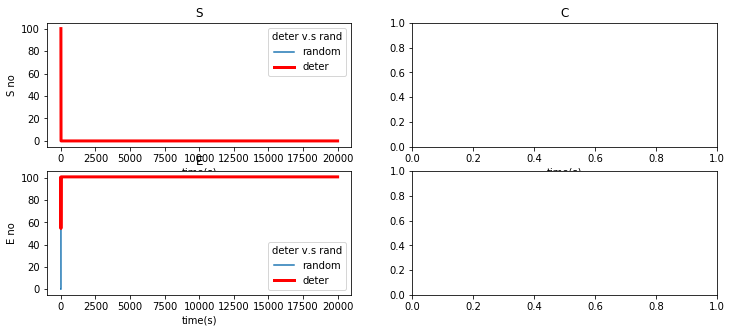

In [67]:
 t_array , S_array , E_array , C_array  , P_array  = t_stochastic(kp, km , k2 ,S0, E0 , C0 , P0) 

fig , ax = plt.subplots(2,2 ,  figsize=(12,5))

ax[0,0].set_title("S")
ax[0,0].set_xlabel('time(s)')
ax[0,0].set_ylabel('S no')

ax[0,0].plot( t_sample * t_array , S_array , label = "random" )
ax[0,0].plot( t_deter[:,0] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[0,0].legend(title = "deter v.s rand")


ax[1,0].set_title("E")
ax[1,0].set_xlabel('time(s)')
ax[1,0].set_ylabel('E no')

ax[1,0].plot( t_sample * t_array , E_array , label = "random" )
ax[1,0].plot( t_deter[:,1] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[1,0].legend(title = "deter v.s rand")

ax[0,1].set_title("C")
ax[0,1].set_xlabel('time(s)')
ax[0,0,1].set_ylabel('C no')

ax[0,1].plot( t_sample * t_array , C_array , label = "random" )
ax[0,1].plot( t_deter[:,2] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[0,1].legend(title = "deter v.s rand")

ax[1,1].set_title("D")
ax[1,1].set_xlabel('time(s)')
ax[1,1].set_ylabel('D no')

ax[1,1].plot( t_sample * t_array , D_array , label = "random" )
ax[1,1].plot( t_deter[:,3] , 'r-' ,label = "deter" , linewidth =3.0 )
ax[1,1].legend(title = "deter v.s rand")